In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sgn





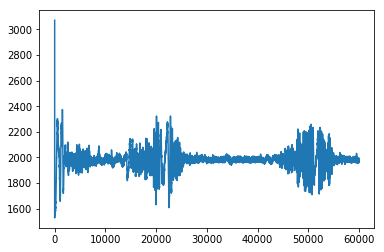

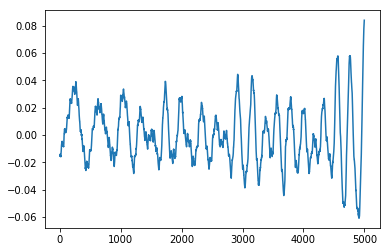

32.0


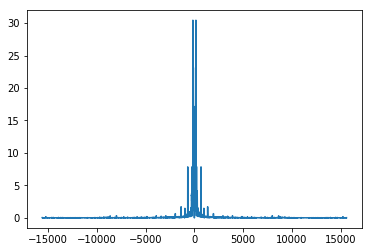

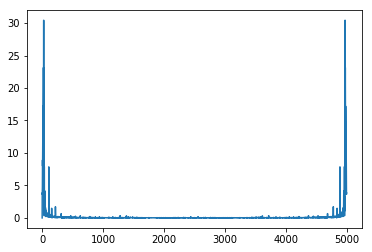

25
156.25
0.971301284708 3.49668462495


In [25]:
from raspi_import import raspi_import


sample_period, data = raspi_import("./out/adcData.bin")

n_start = 15000
n_stop = 20000

def prepros (data, maximum = 4096):
    d = data / maximum
    #d = d - 0.5
    d = d - np.mean(d)
    return d

plt.plot(data[:,3])
plt.show()

q = prepros(data[n_start:n_stop,3])

i =  prepros(data[n_start:n_stop,4])


plt.plot(i)
plt.show()

fft = (np.abs(np.fft.fft(q)))
print(sample_period)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(fft),sample_period/(1e6))),np.fft.fftshift(fft))
plt.show()
plt.plot(fft)
plt.show()
fft_i = np.abs(np.fft.fft(i)[:len(fft)//2])
fft_q = np.abs(np.fft.fft(q))


#cross = sgn.correlate(fft_i,fft_q)
#plt.plot( cross)
#plt.show()

m = np.amax(fft_i)
i = np.where(fft_i == m)[0][0]
print(i)

fn = ((i / (len(fft)))) * 31250


print(fn )
f_0 = 24.13e9
c = 3e8
v = ( c*(fn) )/ (2*(f_0))

print(v, v*3.6)

In [ ]:
maxlag = 10
n21 = findDelay(windowedcorr(x2,x1, maxlag))
n31 = findDelay(windowedcorr(x3,x1, maxlag))
n32 = findDelay(windowedcorr(x3,x2, maxlag))

print("Delays in samples: n21: ",n21," n31: ", n31, " n32: ", n32 )

In [ ]:

from math import atan2

sqrt3 = 1.73205081

def est_theta (n21,n31,n32):
    p = 0
    y = sqrt3*(n21 + n31)
    x = (n21 - n31 - 2*n32)
    
    return atan2(y,x)

theta = est_theta(n21,n31,n32)

print(theta)

print((theta*180) / (np.pi))


In [ ]:

def estimate_angle (data, res=4096):
    
    x1 = prepros(data[1:,0], res)
    x2 = prepros(data[1:,2], res)
    x3 = prepros(data[1:,1], res)
    
    c21 = windowedcorr(x2,x1, maxlag)
    c31 = windowedcorr(x3,x1, maxlag)
    c32 = windowedcorr(x3,x2, maxlag)
    #plt.plot(c21)
    #plt.plot(c31)
    #plt.plot(c32)
    #plt.show()
    n21 = findDelay(c21)
    #print(n21)
    n31 = findDelay(c31)
    #print(n31)
    n32 = findDelay(c32)
    #print(n32)
    
    theta = est_theta(n21,n31,n32)
    #print(theta)

    #print((theta*180) / (np.pi))
    if(theta < 0):
        theta = theta + 2*np.pi
    return theta

sample_period, data = raspi_import("./out/adcData_mic_180.bin")
theta = estimate_angle(data)


In [ ]:
sample_period, temp_data = raspi_import("./out/adcData_mic_315.bin")
plt.plot(temp_data[1:,0])
plt.show()
plt.show()

In [ ]:
estimate_angle(temp_data)

In [279]:


sample_period, d0 = raspi_import("./out/adcData_mic_0.bin")
sample_period, d45 = raspi_import("./out/adcData_mic_45.bin")
sample_period, d90 = raspi_import("./out/adcData_mic_90.bin")
sample_period, d120 = raspi_import("./out/adcData_mic_120.bin")
sample_period, d145 = raspi_import("./out/adcData_mic_145.bin")
sample_period, d180 = raspi_import("./out/adcData_mic_180.bin")
sample_period, d235 = raspi_import("./out/adcData_mic_235.bin")
sample_period, d245 = raspi_import("./out/adcData_mic_245.bin")
sample_period, d270 = raspi_import("./out/adcData_mic_270.bin")
sample_period, d315 = raspi_import("./out/adcData_mic_315.bin")

arr = np.array([(d0,0,),(d45,45,),(d90,90,),(d120,120,),(d145,145,),(d180,180,),(d235,235,),(d245,245,),(d270,270,),(d315,315,)])
result = np.array([np.zeros((len(arr) )),np.zeros((len(arr))),np.zeros((len(arr)))]).transpose()
text = ("Estimated angle", "Actual angle", "Deviation")
for i in range(len(arr)):
    est = round((estimate_angle(arr[i][0])*180) / (np.pi),2)
    actual = arr[i][1]
    result[i] = [est,actual,round(actual - est,2)]
    
    
from IPython.display import HTML, display

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
        
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in result)
       )
))


print(result[1:,2])

6.59,0.0,-6.59
40.89,45.0,4.11
90.0,90.0,0.0
120.0,120.0,0.0
150.0,145.0,-5.0
186.59,180.0,-6.59
229.11,235.0,5.89
240.0,245.0,5.0
273.67,270.0,-3.67
300.0,315.0,15.0


[  4.11   0.     0.    -5.    -6.59   5.89   5.    -3.67  15.  ]
